In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.equipment.hittite_controller

In [3]:
import kid_readout.equipment.lockin_controller

In [4]:
hmc = kid_readout.equipment.hittite_controller.hittiteController(addr='192.168.0.200')

In [5]:
hmc.set_freq(12e9)

In [6]:
li = kid_readout.equipment.lockin_controller.lockinController()

In [7]:
li.get_idn()

'Stanford_Research_Systems,SR830,s/n45571,ver1.07 \r'

In [8]:
li.get_sensitivity()

(16, 0.00050000000000000001)

In [9]:
li.get_data()

(4.55084e-05, -6.85457e-07, 4.55084e-05, -0.84)

In [10]:
import time

In [33]:
freqs = np.linspace(140e9,161e9,1000)
zbd = []
for fr in freqs:
    hmc.set_freq(fr/12.)
    time.sleep(0.5)
    r,_,_,_ = li.get_data()
    zbd.append(r)
zbd = np.array(zbd)

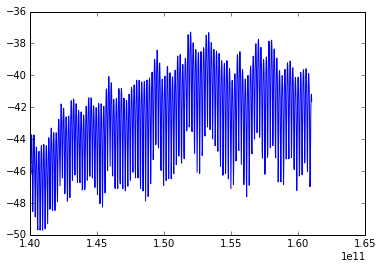

In [36]:
plot(freqs,10*np.log10(zbd))
#xlim(150e9,151e9)

In [45]:
dt = np.fft.fftfreq(len(zbd))[:len(zbd)//2]*21e9/3e8

(-20, 0)

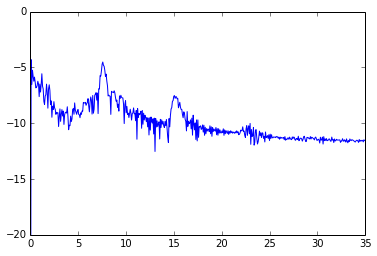

In [46]:
plot(dt,np.log(np.abs(np.fft.rfft(zbd-zbd.mean())[:-1])))
ylim(-20,0)
#xlim(0,30)

In [47]:
1/6.

0.16666666666666666